In [66]:
# uploading the images that I have chosen with their internet addresses
!wget "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgSsp2O3OzI2VSfGK-2z2xSBUSPkuPpmMcpTCoaEmQGbiWSTrlI7SuImLtb0b6D0kBD6Jd3fPt7_EXoqWgKDctpRqexNjplK5lLaIGzXpuA8ArIKZskD6OAR0w9iqO0i1Y25miFTljYlV3PY01MATesfx8kJN3nV6EJvSs4Lf0bemekBtfG4Kny0qINTw/s400/cat.jpg"
!wget "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhawnGt77G972vxCbUmqILQy695oBBeLZCxtlXUfxcnGHef-UA0l-2R8pqFVA6zRwhHBwz5a1A13lLUkeR4xXdrTr29x-TVNsumVcmLQtGZ2890Jw46yKbDF1hVlB99bNEpNGOgMOKalwOG7n1wQxgxnsHDU8Tvf3tsbeyRu5Zgg-HFiRrkWbU7bD_xdg/s400/mask.png"
!wget "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiP_CezgyQS9U96gLlh_EAFwbAOwD6HazTx3LuKS5KXsV5pEvnZN9llZP8w3M7FuPBrqTuWFcbq_0YDXngnTmFDFv2aerwN4Tt7FxeyRBwQhzeEC_eR-matSYSlHWhvNEoe7IfiQ-KwH3SAzBCZ7U9recmzJ9vatt1Fsbf5yG-A9EZa_RbdRu9gyTRnCA/s1134/space.jpg"


--2023-04-09 14:45:05--  https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgSsp2O3OzI2VSfGK-2z2xSBUSPkuPpmMcpTCoaEmQGbiWSTrlI7SuImLtb0b6D0kBD6Jd3fPt7_EXoqWgKDctpRqexNjplK5lLaIGzXpuA8ArIKZskD6OAR0w9iqO0i1Y25miFTljYlV3PY01MATesfx8kJN3nV6EJvSs4Lf0bemekBtfG4Kny0qINTw/s400/cat.jpg
Resolving blogger.googleusercontent.com (blogger.googleusercontent.com)... 173.194.193.132, 2607:f8b0:4001:c0f::84
Connecting to blogger.googleusercontent.com (blogger.googleusercontent.com)|173.194.193.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12629 (12K) [image/jpeg]
Saving to: ‘cat.jpg.5’

cat.jpg.5           100%[===================>]  12.33K  --.-KB/s    in 0s      

2023-04-09 14:45:06 (87.5 MB/s) - ‘cat.jpg.5’ saved [12629/12629]

--2023-04-09 14:45:06--  https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhawnGt77G972vxCbUmqILQy695oBBeLZCxtlXUfxcnGHef-UA0l-2R8pqFVA6zRwhHBwz5a1A13lLUkeR4xXdrTr29x-TVNsumVcmLQtGZ2890Jw46yKbDF1hVlB99bNEpNGOgMOKalwOG7n1wQxgxns

In [67]:
import cv2                                        # importing the needed classes to show and process the images 
from matplotlib import pyplot as plt  

fgImg = cv2.imread('cat.jpg')                     # reading foreground image 
fgImg = cv2.cvtColor(fgImg, cv2.COLOR_BGR2RGB)    # converting it from BGR to RBG

fgMask = cv2.imread('mask.png')                   # reading foreground image's mask
fgMask = cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB)  # converting it from BGR to RBG

bgImg = cv2.imread('space.jpg')                   # reading background image 
bgImg = cv2.cvtColor(bgImg, cv2.COLOR_BGR2RGB)    # converting it from BGR to RBG


In [68]:
# defining a method that smoothes the image with using gaussian smoothing
def gaussianSmoothing(img, sigma):

  size = 6*sigma                      # calculating kernel size
  if(size % 2 == 0):                  # if size is even add 1 to make it odd and bigger than 6 * sigma
    size = size + 1

  filt = cv2.getGaussianKernel(ksize = int(size), sigma = sigma)                # getting the gaussian kernel
  img = cv2.sepFilter2D(src=img, ddepth = -1, kernelX =  filt, kernelY = filt)  # applying the gaussian kernel to the image

  return img              # returning the filter applied image 

Original background


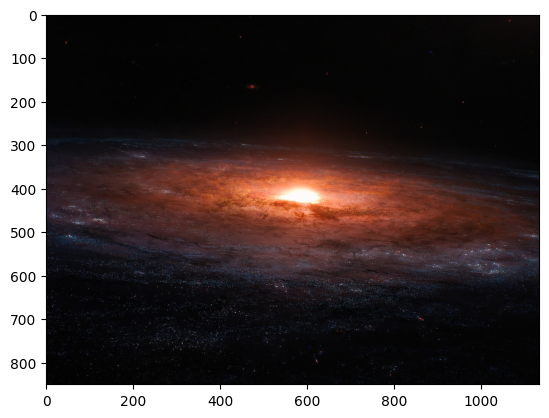

In [69]:
print("Original background")  # printing the plot
plt.imshow(bgImg)             # showing the image on the screen
plt.show()

Gaussian smoothing with sigma = 5


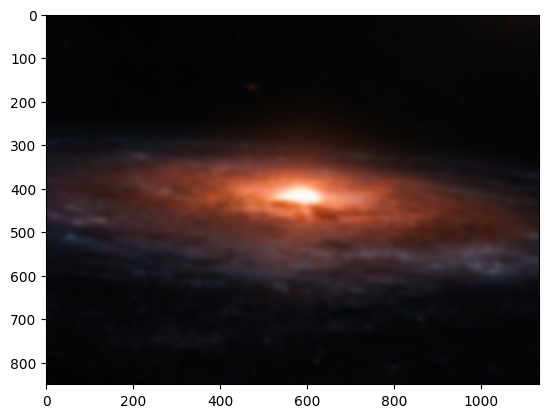

In [70]:
print("Gaussian smoothing with sigma = 5")  # printing the plot
smooth1 = gaussianSmoothing(bgImg, 5)       # applying the gaussian smoothing function
plt.imshow(smooth1)                         # showing the filtered image on the screen
plt.show()

Gaussian smoothing with sigma = 21


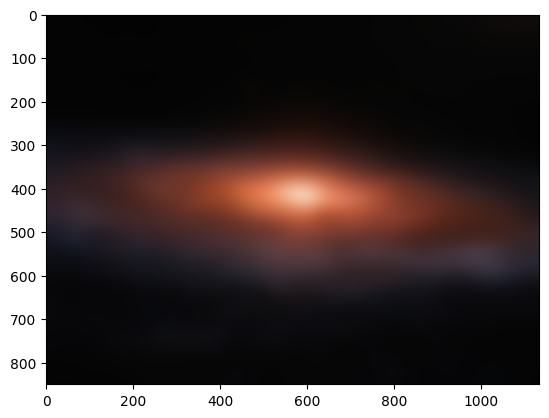

In [71]:
print("Gaussian smoothing with sigma = 21")  # printing the plot
smooth2 = gaussianSmoothing(bgImg, 21)       # applying the gaussian smoothing function
plt.imshow(smooth2)                          # showing the filtered image on the screen
plt.show()

In [72]:
# defining a method that sharpens the image with using gaussian smoothing
def unsharpMasking(img, sigma):

  blur = gaussianSmoothing(img, sigma)  # applying the gaussian smoothing function on the image
  subtracted = cv2.subtract(img, blur)  # subtracting the filtered(smoothed) image from the original 
  img = cv2.add(subtracted,img)         # adding the unsharp mask to the original 

  return img              # returning the filter applied image                     

Original foreground


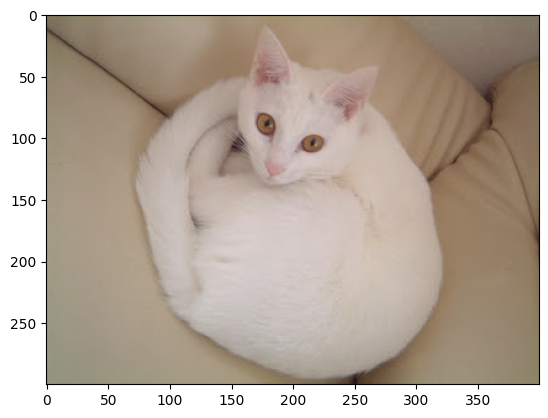

In [73]:
print("Original foreground")  # printing the plot
plt.imshow(fgImg)             # showing the image on the screen
plt.show()

Unsharp masking with sigma = 7


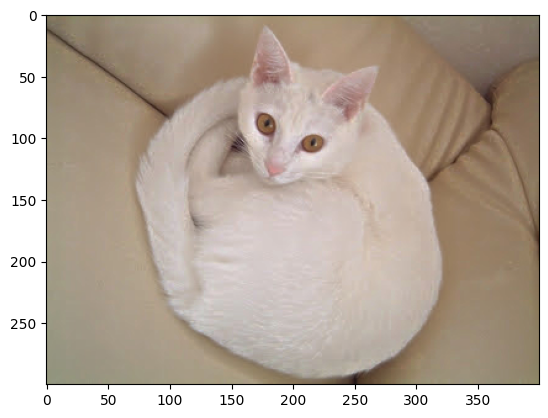

In [74]:
print("Unsharp masking with sigma = 7")     # printing the plot
sharp1 = unsharpMasking(fgImg, 7)           # applying the unsharp masking function
plt.imshow(sharp1)                          # showing the filtered image on the screen
plt.show()

Unsharp masking with sigma = 100


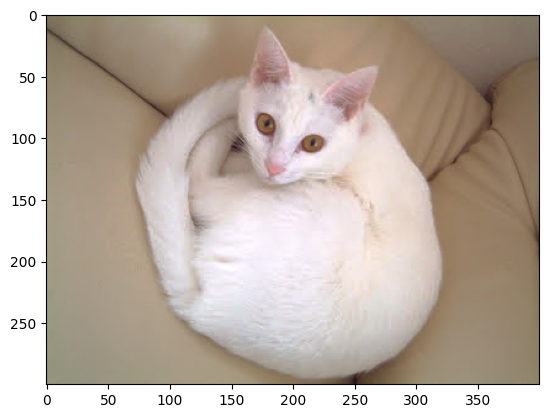

In [75]:
print("Unsharp masking with sigma = 100")   # printing the plot
sharp2 = unsharpMasking(fgImg, 100)         # applying the unsharp masking function
plt.imshow(sharp2)                          # showing the filtered image on the screen
plt.show()

In [76]:
# defining a method that helps to combine images
def combineForegroundBackground(fgImg, fgMask, bgImg, topLeft):

  subtracted = cv2.subtract(fgImg, fgMask)                        # subtracting the mask from the foreground
  subtracted = cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB)        # converting it from BGR to RBG 

  kedi = cv2.subtract(fgImg, subtracted)                          # subtracting the subtracted from the foreground to get the cat alone     
  kedi = cv2.cvtColor(kedi, cv2.COLOR_BGR2RGB)                    # converting it from BGR to RBG

  newImg = bgImg                                                  # creating a new image that we will store the combined image 
  newImg = cv2.cvtColor(newImg, cv2.COLOR_BGR2RGB)                # converting it from BGR to RBG
                                                            
  x = topLeft[0]                                                  # x & y will help to iterate over the new image
  y = topLeft[1]                                                  #  
  i = 0                                                           # i & j will help to iterate over the cat image
  j = 0

  while(x < (len(bgImg)) and i < len(kedi)):                      # since the images are also 2D arrays this nested for loop will help us to
    while(y < (len(bgImg[0])) and j < len(kedi[0])):              # iterate over the images (first x axis, then y axis)
      if(any(subtracted[i][j]) == False):                         # if the subtracted image's pixel is empty
          newImg[x][y] = kedi[i][j]                               # then add cat image to the new image
      y = y + 1
      j = j + 1                                                   # in the inner loop increase y & j by 1
    x = x + 1                                               
    i = i + 1                                                     # in the outer loop increase x & i by 1
    y = topLeft[1]
    j = 0                                                         # in the outer loop set x & j to the base numbers
    
  return newImg                                                   # after combining two images return the new image


combined image without sharpening foreground and smoothing background


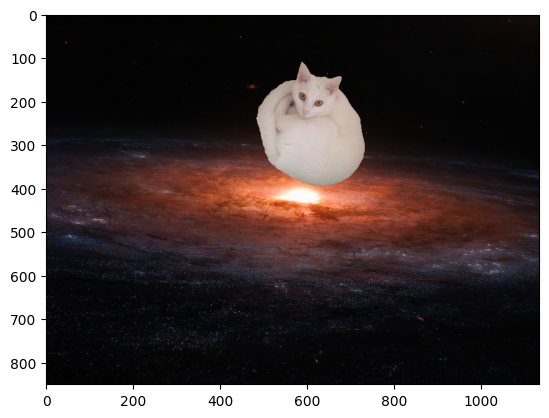

In [77]:
topLeft = [100,410]               # defining where top left of the foreground should lay on the background

print("combined image without sharpening foreground and smoothing background")
newImg1 = combineForegroundBackground(fgImg, fgMask, bgImg, topLeft)    # creating combined image with calling the method
newImg1 = cv2.cvtColor(newImg1, cv2.COLOR_BGR2RGB)                      # converting it from BGR to RBG

plt.imshow(newImg1)                # showing the new image on the screen
plt.show()

combined image with sharpening foreground and smoothing background for two different combination of sigma values


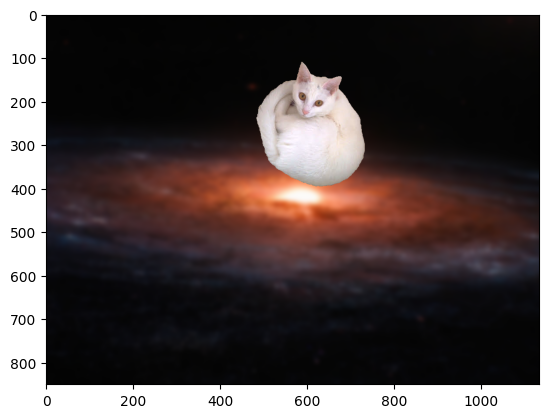

In [78]:
print("combined image with sharpening foreground and smoothing background for two different combination of sigma values")
newImg2 = combineForegroundBackground(sharp2, fgMask, smooth1, topLeft)    # creating combined image with calling the method
newImg2 = cv2.cvtColor(newImg2, cv2.COLOR_BGR2RGB)                         # converting it from BGR to RBG

plt.imshow(newImg2)                # showing the new image on the screen
plt.show()

combined image with sharpening foreground and smoothing background for two different combination of sigma values


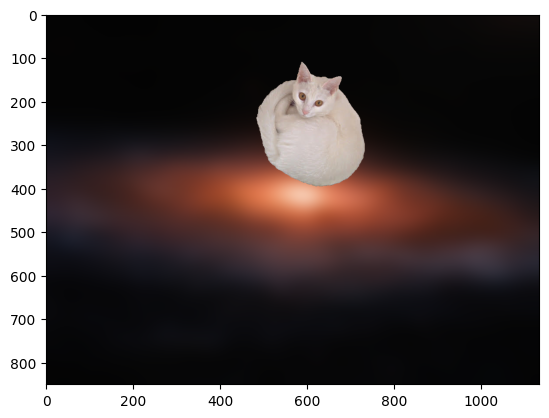

In [79]:
print("combined image with sharpening foreground and smoothing background for two different combination of sigma values")
newImg3 = combineForegroundBackground(sharp1, fgMask, smooth2, topLeft)    # creating combined image with calling the method
newImg3 = cv2.cvtColor(newImg3, cv2.COLOR_BGR2RGB)                         # converting it from BGR to RBG

plt.imshow(newImg3)                # showing the new image on the screen
plt.show()